https://www.kaggle.com/ahmadjaved097/analyzing-the-google-playstore

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import missingno as msno
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


# 데이터 구성 - 건호님 자료

# 데이터 전처리

        1. 결측치 확인
           Rating, Version data 결측치 존재
               - Rating : 1,473개 데이터 -> NaN값 데이터 존재
                   => 모두 0으로 처리 (사용자의 평가 유보 대상 서비스 판단, Install정보 기반) 
                       * Installs수( Rating 0 mean / 전체 mean / 전체 median) : (4,095, 1,546만, 10만)

               - Version : Current Ver 8개 / Android Ver 2개 
                   => 모두 0으로 처리 


        2. 이상치 제거
           2개 행(데이터) 이상치 제거
               - 총 rows 수 : 10841개 -> 10839개


        3. 컬럼별 데이터타입 변경
           Size, Reviews, Installs, Price, Rating : 숫자로 변경


        4. 컬럼 추가
           - Log 값 적용한 컬럼 생성 : Installs_log, Reviews_log
           - 추가 이유 : 데이터의 증감 추세 유지 하 데이터 수치 너비를 좁혀 분석 용이성 제고


## Googlestore 구성 

In [2]:
df = pd.read_csv('/Users/kimjeongseob/Desktop/Github upload/5.EDA/EDA 프로젝트/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 데이터 전처리

### 1. Install 컬럼 log 

In [3]:
# '+', ',' 문자 제거

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',''))
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))

# 10472행 제거(Installs = free)

df = df.drop(index = 10472)

# object -> int 형 변환
df['Installs'] = pd.to_numeric(df['Installs'])
#결과
df['Installs']

#
df['Installs_log'] = np.log10(df.Installs)

#
df['Installs_log'].loc[df.Installs_log == float('-inf')] = 0

#
df.Installs_log.unique()

array([4.     , 5.69897, 6.69897, 7.69897, 5.     , 4.69897, 6.     ,
       7.     , 3.69897, 8.     , 9.     , 3.     , 8.69897, 1.69897,
       2.     , 2.69897, 1.     , 0.     , 0.69897])

### Checking features of each column given in the dataset


### 1. Category


```
There are 34 different app categories present in the Google Playstore.
The 34th category(1.9) is some what different from other app categories.Checking it
```

In [4]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log


In [5]:
# 데이터 제거 - 10472 행

df = df.drop(df.index[[10472]])

### Countplot of Number of Apps on the basis of category


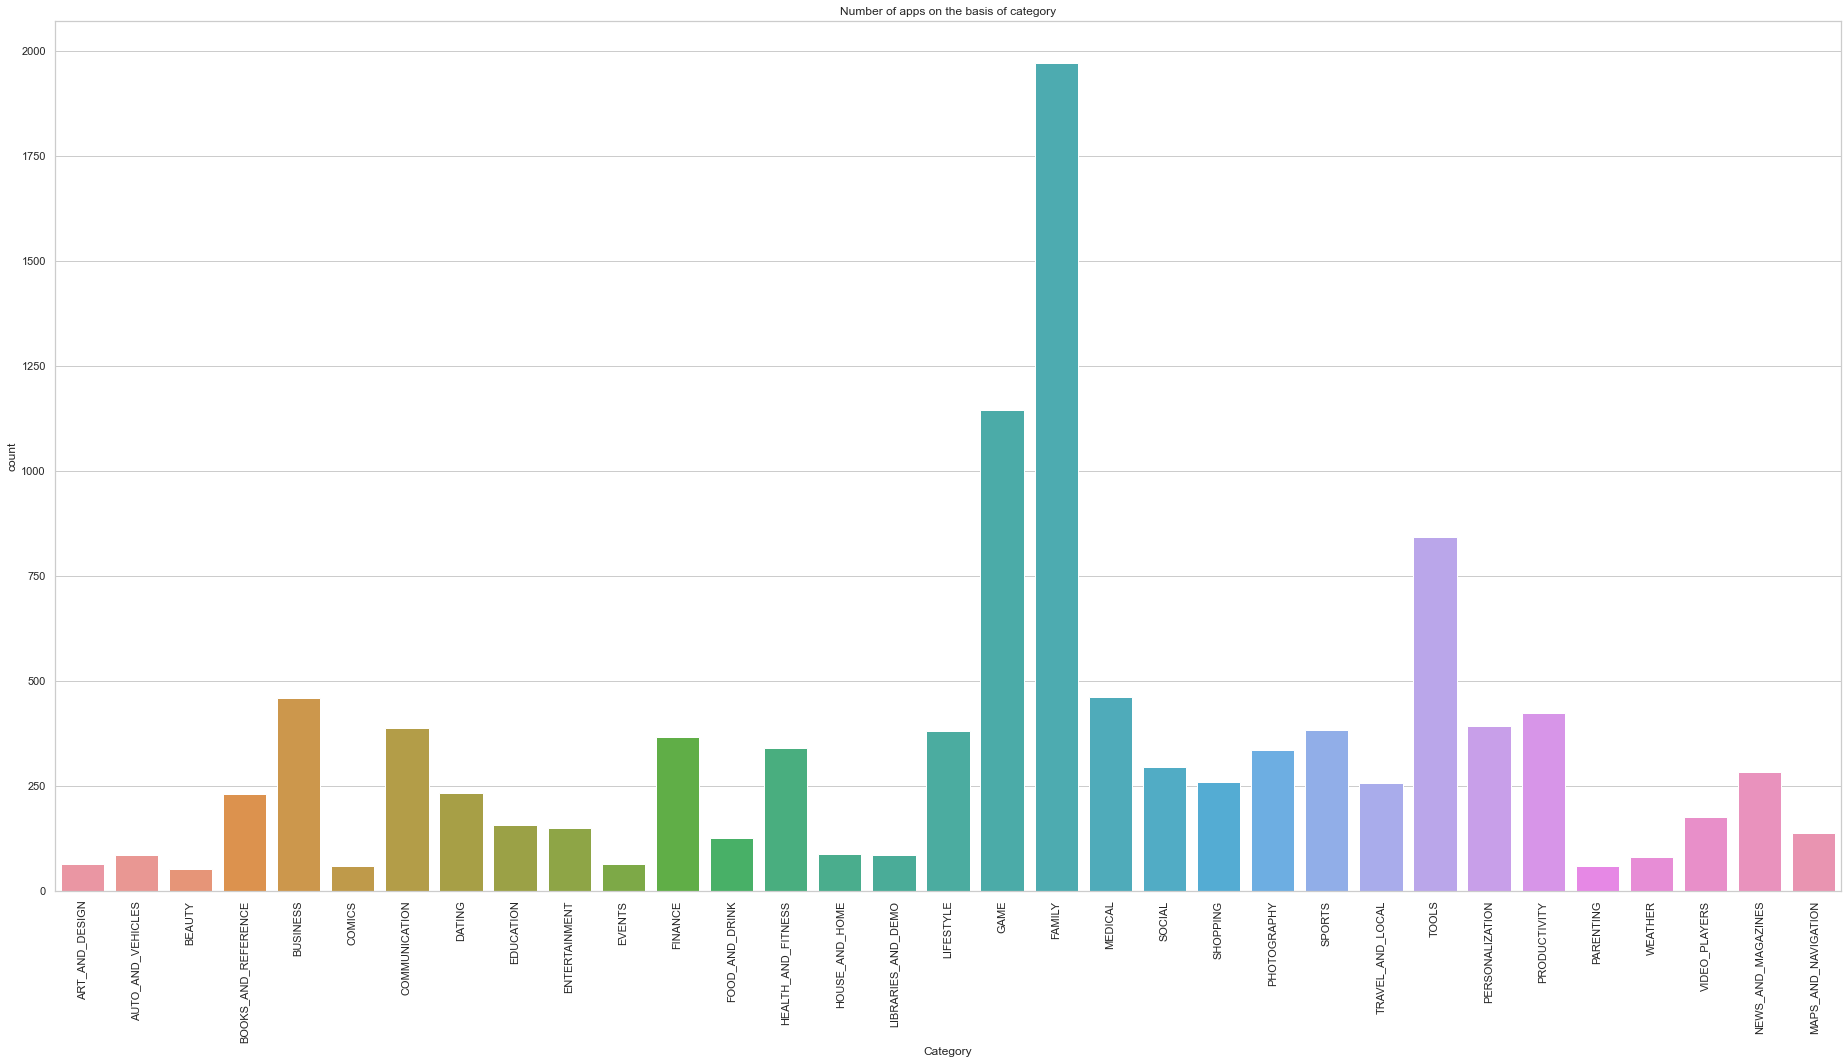

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(32,16))
plt.title('Number of apps on the basis of category')
sns.countplot(x='Category',data = df)
plt.xticks(rotation=90)
plt.show()

```
가장 많은 앱 카테고리는 패밀리였으며, 그 뒤를 이어 게임 카테고리가 이다

### Top 10 App Categories

In [7]:
category = pd.DataFrame(df['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

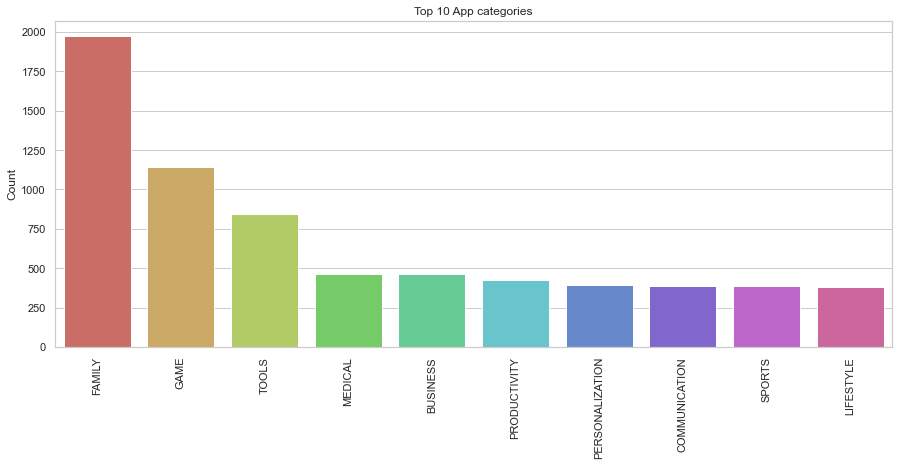

In [8]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

```
Family category has the most number of apps with 18% of apps belonging to it followed by Games category which has 11% of the apps.Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

```
### 가장 많은 앱 카테고리수는 패밀리이며 그뒤는 게임으로 일상생활에 쓰이는 정도 

### 2. Rating


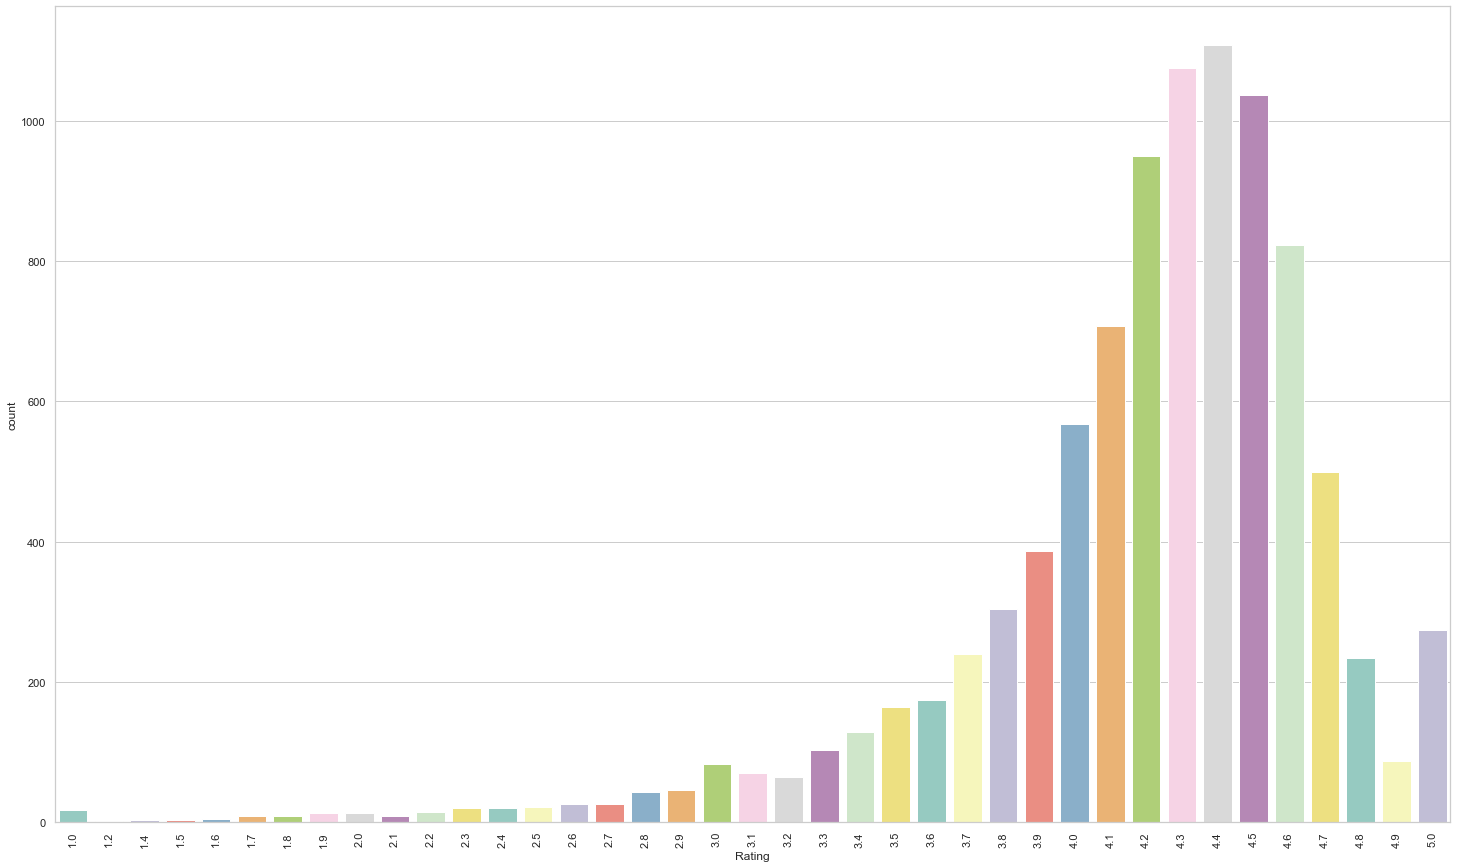

In [9]:
#각 Rating별 갯수
plt.subplots(figsize=(25,15))
plt.xticks(rotation=90)
ax = sns.countplot(x="Rating", data=df, palette="Set3")

In [11]:
#Rating describe
df['Rating'].describe()

count    9365.000000
mean        4.191757
std         0.515246
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [12]:
# Rating 외도,첨도,중앙값 
print("Skewness: %f" % df['Rating'].skew())
print("Kurtosis: %f" % df['Rating'].kurt())
print("median: %f" % df['Rating'].median())

Skewness: -1.849591
Kurtosis: 5.785974
median: 4.300000


### Rating 평균은 4.19 중앙값은 4.3 으로 크게 다르지 않았으며  비대칭도는 -2로 크게 벗어나지 않았다 

Text(0.5, 1.0, ' Installs_log VS Rating')

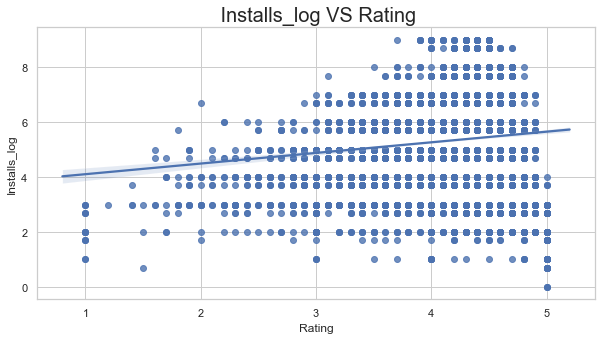

In [13]:
#Rating와Installs_log 전체 산점도
rcParams['figure.figsize'] = (10, 5)
sns.regplot(x = 'Rating', y = 'Installs_log', data = df) 
plt.title(" Installs_log VS Rating", size = 20)

In [14]:
df.describe()

,Rating,Installs,Installs_log
count,9365.000000,1.083900e+04,10839.000000
mean,4.191757,1.546484e+07,4.880817
std,0.515246,8.503327e+07,1.975355
min,1.000000,0.000000e+00,0.000000
25%,4.000000,1.000000e+03,3.000000
50%,4.300000,1.000000e+05,5.000000
75%,4.500000,5.000000e+06,6.698970
max,5.000000,1.000000e+09,9.000000


In [15]:
#상관관계
df.corr()

,Rating,Installs,Installs_log
Rating,1.000000,0.051355,0.119587
Installs,0.051355,1.000000,0.318595
Installs_log,0.119587,0.318595,1.000000


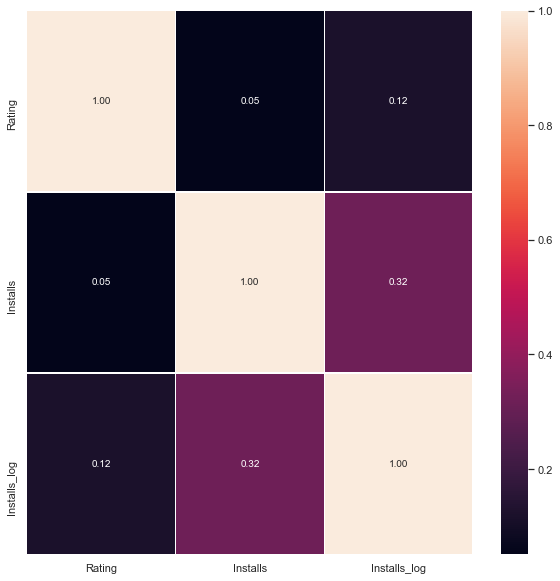

In [16]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = ".2f", ax=ax)

### Installs_log 와 Rating의 전체 산점도는 3 ~ 5사이에 가장 많이 분포 되어 있으며 상관관계는 낮았다. 
### Rating이 높다고 해서 좋은 앱은 아니며 Install 에 영향을 주진 않았다 

In [17]:
rating_greater_4 = len(df[df['Rating'] >= 4])/len(df)*100
print('Percentage of Apps having ratings of 4 or greater: {}%'.format(round(rating_greater_4,2)))



Percentage of Apps having ratings of 4 or greater: 67.97%


### 3.Size


```
In the Size columns either the size is given in MB or kB or it's written that the size varies with the device.
I have converted all the app sizes given in kB and MB to MB. Also 1 have used 1kB = 1000MB
```

In [18]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M',''))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k','e-3'))

In [19]:
#Converting the data type of Size category to float wherever possible
def convert(val):
    try:
        return float(val)
    except:
        return val
df['Size'] = df['Size'].apply(lambda x: convert(x))


In [20]:
#Seperate the apps whose size is given from those whose size varies with the device.
sized = df[df['Size'] != 'Varies with device'].copy()

In [21]:
sized['Size'] = pd.to_numeric(sized['Size'])

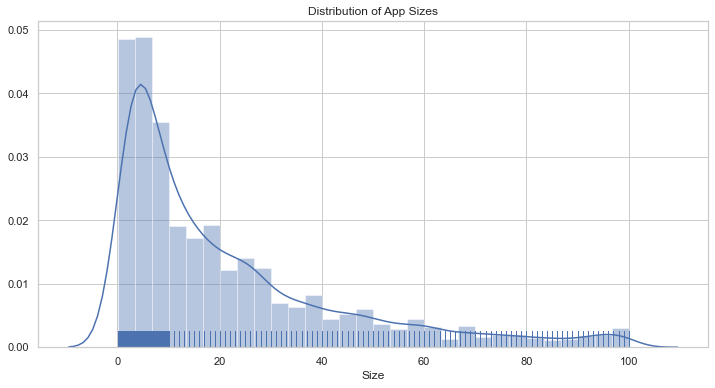

In [22]:
plt.figure(figsize=(12,6))
plt.title('Distribution of App Sizes')
sns.distplot(sized['Size'],bins = 30,rug=True)
plt.show()


```
In the dataset majority(88%) of the apps whose size are given have app size less than or equal to 50MB
```
### App Size는 0과 10MB 이내에 가장 많이 분포 되어 있다. 
### 10MB이상과 비교했을때 큰 차이를 보였다

### 4.Reviews

### 4.Reviews

In [23]:
# 형 변환 (object -> numeric)
df['Reviews'] = pd.to_numeric(df['Reviews'])
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10839, dtype: int64

In [24]:
df['Reviews_log'] = np.log10(df['Reviews'])

In [25]:
df.loc[df.Reviews_log == float('-inf')] = 0

In [26]:
df.sort_values('Reviews_log',ascending=False).head(2).Reviews

2544    78158306
3943    78128208
Name: Reviews, dtype: int64

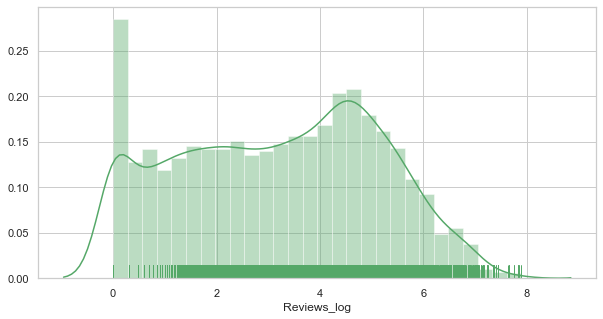

In [27]:
#histogram

plt.figure(figsize=(10,5))
sns.distplot(df['Reviews_log'],color='g',rug=True)

In [28]:
print("reviews_log 최소값 : {}, 최대값 : {}".format(df.Reviews_log.min(),df.Reviews_log.max()))

reviews_log 최소값 : 0.0, 최대값 : 7.892975137931482


### Findings

    1) Review 갯수는 약 1억개까지 분포
    2) Review 갯수 상위 앱은 Facebook (약 1억 5천개)

## 4-1. Reviews 데이터 추가분석 (상관성)

    1) log값 취한 데이터를 기준으로 상관성 분석
    2) 목표하는 Installs 컬럼을 포함한 전체 특징들과 분석



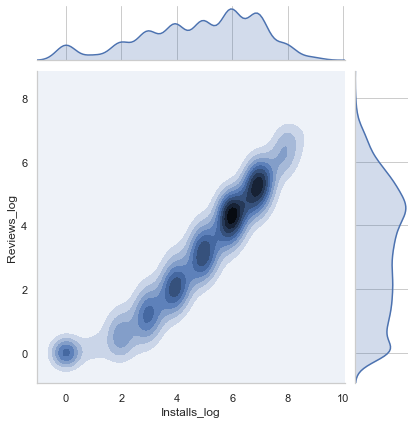

In [29]:
# kernel density function 적용

sns.jointplot(x="Installs_log", y="Reviews_log", data=df, kind='kde')

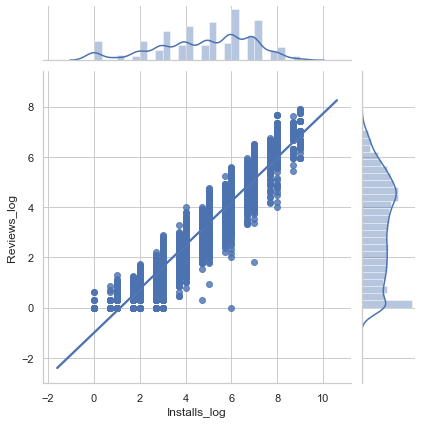

In [30]:
# joint scatter plot

sns.jointplot(x="Installs_log", y="Reviews_log", data=df, kind='reg')

In [31]:
df.corr()['Reviews_log']

Rating          0.499426
Reviews         0.289243
Installs        0.314730
Installs_log    0.956188
Reviews_log     1.000000
Name: Reviews_log, dtype: float64

### Finding

```
Reviews수의 로그를 취한 데이터와 상관관계를 보인 데이터
    : Installs_log, Rating

```

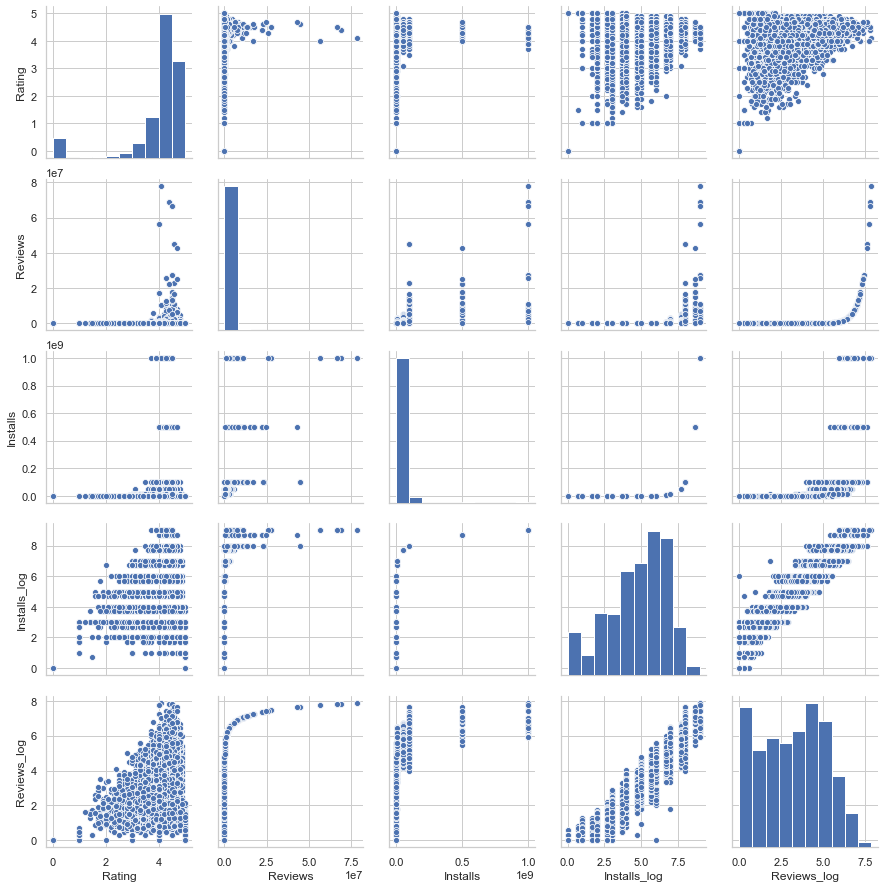

In [32]:
sns.pairplot(df)

# reviews_log <-> rating

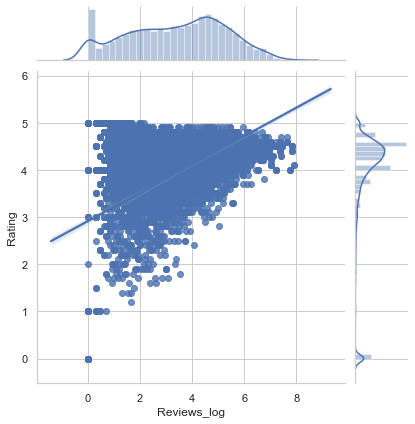

In [33]:
sns.jointplot(x="Reviews_log", y="Rating", data=df, kind='reg')

# reviews_log <-> category

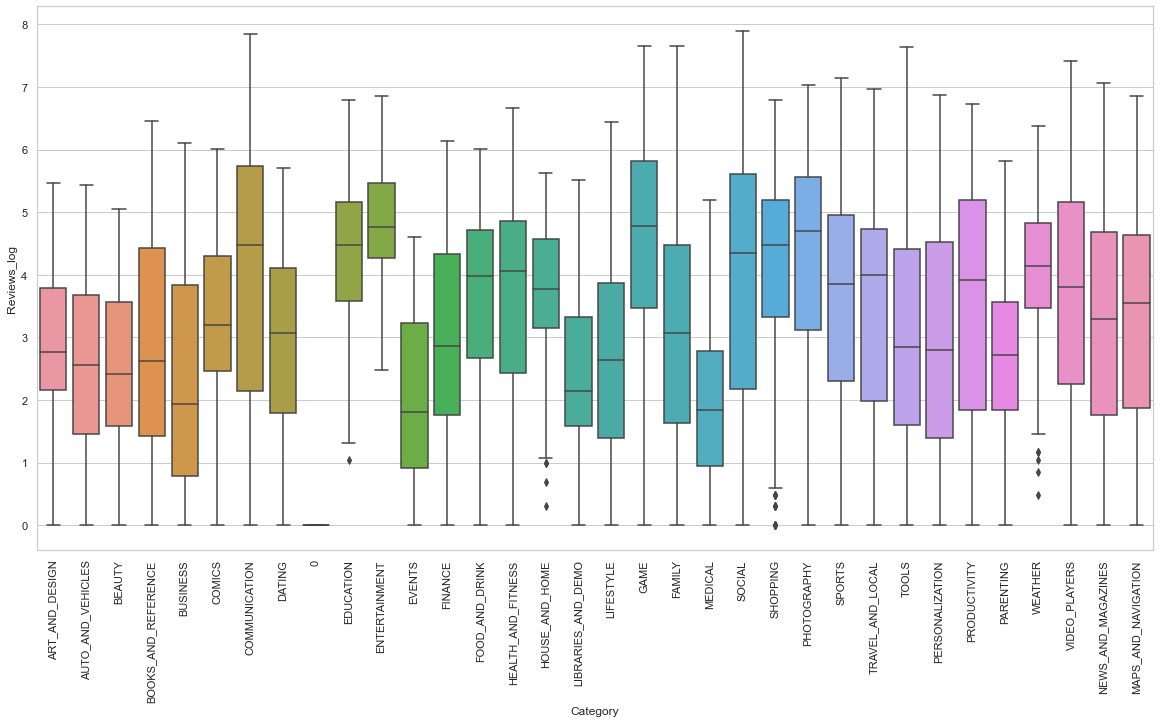

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Category", y="Reviews_log", data=df)
plt.xticks(rotation=90)
plt.show()

### 4. Installs

count    10839.000000
mean         4.809009
std          2.113471
min          0.000000
25%          3.000000
50%          5.000000
75%          6.698970
max          9.000000
Name: Installs_log, dtype: float64


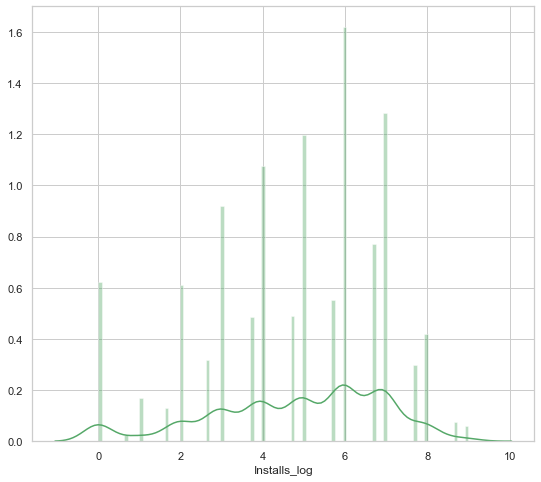

In [35]:
print(df['Installs_log'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Installs_log'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [36]:
print("평균 설치횟수 : {}회, 최대 설치횟수 : {}회, 최소 설치횟수 : {}회".format(df['Installs'].mean(),df['Installs'].max(),df['Installs'].min()))


평균 설치횟수 : 15464803.26884399회, 최대 설치횟수 : 1000000000회, 최소 설치횟수 : 0회


### Finding
```
설치횟수가 1백만 이상인 앱의 비중 : 14.57%, 1천만 이상인 앱의 비중 : 11.55%
평균 설치 횟수 : 1천 5백만 회
최대 설치 횟수 : 10억 회
최소 설치 횟수 : 0회
```

### 5. Type


In [37]:
print('Apps on the basis of Type are classified as')
print('--------------------------------------------------------------------')

count = 1
for i in df['Type'].unique():
    print(count,': ',i)
    count = count + 1

Apps on the basis of Type are classified as
--------------------------------------------------------------------
1 :  Free
2 :  Paid
3 :  0


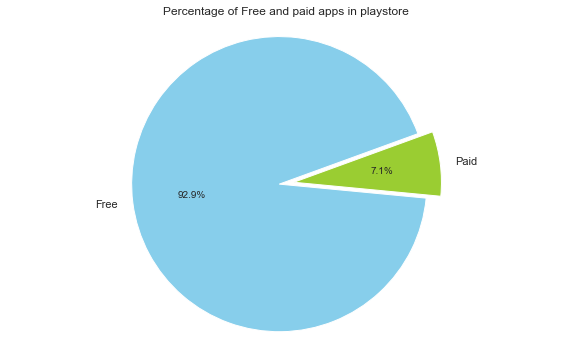

In [38]:
plt.figure(figsize=(10,6))

# Data to plot
labels = ['Free','Paid']
sizes = [len(df[df['Type'] == 'Free']),len(df[df['Type'] == 'Paid'])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.title('Percentage of Free and paid apps in playstore')
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', startangle=380,colors=colors,explode=explode)

plt.axis('equal')
plt.show()

```
Most of the apps in the app store are free.Only a small percentage of apps are paid apps.
```

### 6. Price

In [39]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$',''))
df['Price'] = pd.to_numeric(df['Price'])


#### Seperating paid apps from free apps



```
I have created a seperate dataset for paid apps from the whole playstore dataset
```

In [40]:
paid_apps = df[df['Price'] != 0]

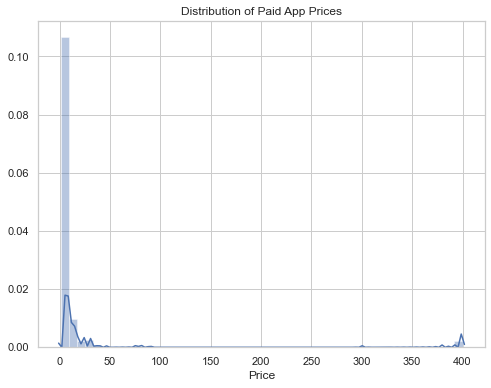

In [41]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Paid App Prices')
sns.distplot(paid_apps['Price'],bins=50)
plt.show()

In [42]:
price_less_10 = len(paid_apps[paid_apps['Price'] <= 10])/len(paid_apps)*100
print('Percentage of Apps having price less than 10$: {}%'.format(round(price_less_10,2)))

Percentage of Apps having price less than 10$: 89.36%


```
89% apps in the play store have a price tag of 10$ or less. Although some apps have price greater than 350\$

Checking apps having price greater than 350$
```

In [43]:
paid_apps[paid_apps['Price'] >= 350]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log,Reviews_log
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,2.00000,0.778151
4362,💎 I'm rich,LIFESTYLE,3.8,718,26,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,4.00000,2.856124
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,4.00000,2.439333
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,5.00000,3.549861
5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,4.00000,2.932474
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,4.69897,3.271144
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up,3.00000,1.612784
5358,I am Rich!,FINANCE,3.8,93,22,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,3.00000,1.968483
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,3.69897,2.673942
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,3.69897,2.303196


```
We found that 16 apps by the name I am rich or having similar names have a price tage of 399$ and most of them even have 10,000+ downloads.
```

### 7. Content Rating


In [44]:
print('Apps on the basis of Content Rating are classified as')
print('-------------------------------------------------------------------')

count = 1
for i in df['Content Rating'].unique():
    print(count,': ',i)
    count = count + 1

Apps on the basis of Content Rating are classified as
-------------------------------------------------------------------
1 :  Everyone
2 :  Teen
3 :  Everyone 10+
4 :  Mature 17+
5 :  Adults only 18+
6 :  0
7 :  Unrated


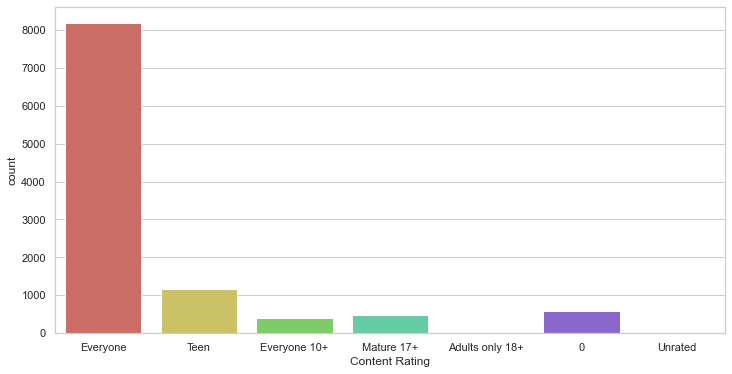

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Content Rating'],palette='hls')
plt.show()

In [46]:
print('Percentage of Apps having content rating as everyone: {}%'.format(round(len(df[df['Content Rating'] == 'Everyone'])/len(df)*100,2)))


Percentage of Apps having content rating as everyone: 75.57%


### 8. Genres


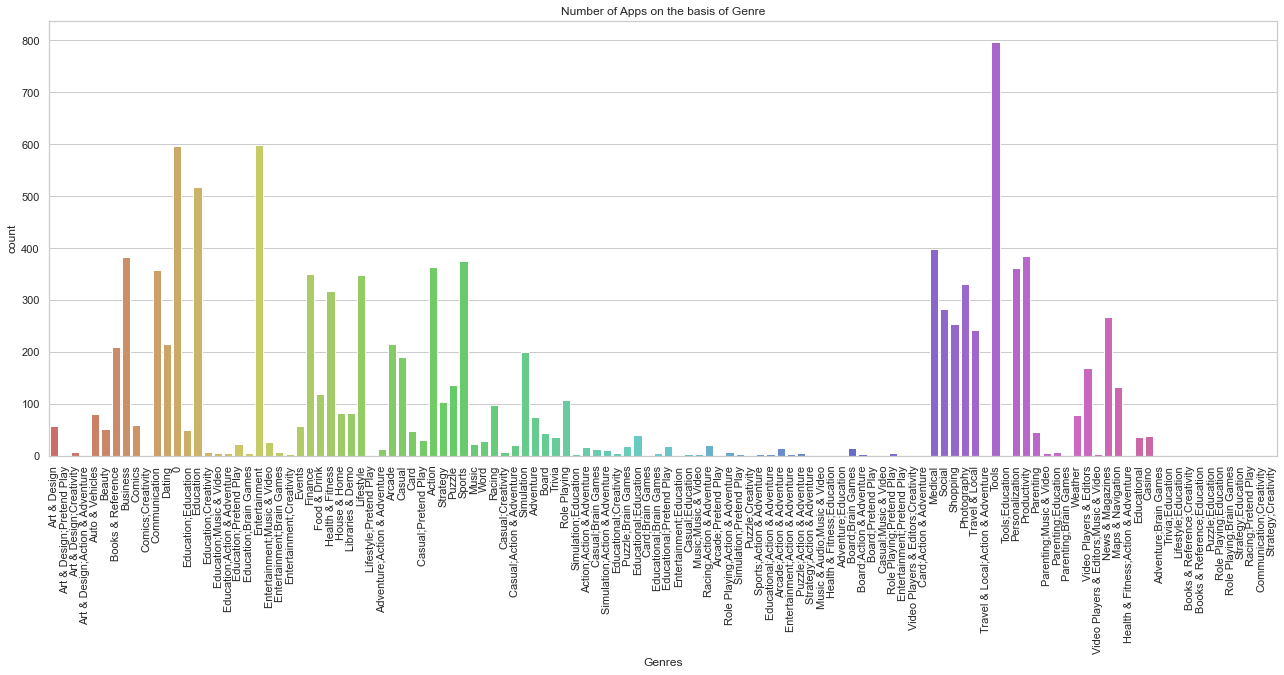

In [47]:
plt.figure(figsize=(22,8))
plt.title('Number of Apps on the basis of Genre')
sns.countplot(x='Genres',data = df,palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [48]:
print('Total Number of Genres: ',df['Genres'].nunique())


Total Number of Genres:  120


```
There are 119 Genres in the app store with the Tools Genre having the highest number of apps followed by Entertainment.
```

### 10. Current Version

```
22.6% of the apps out of 10840 apps require android version 4.1 or greater version to work.
```

In [50]:
#function to convert columns to numeric data type from object data type
for i in df.columns:
    try:
        df[i] = pd.to_numeric(df[i])
    except:
        pass


### Relationships between different features¶


### 1. Rating vs. Category

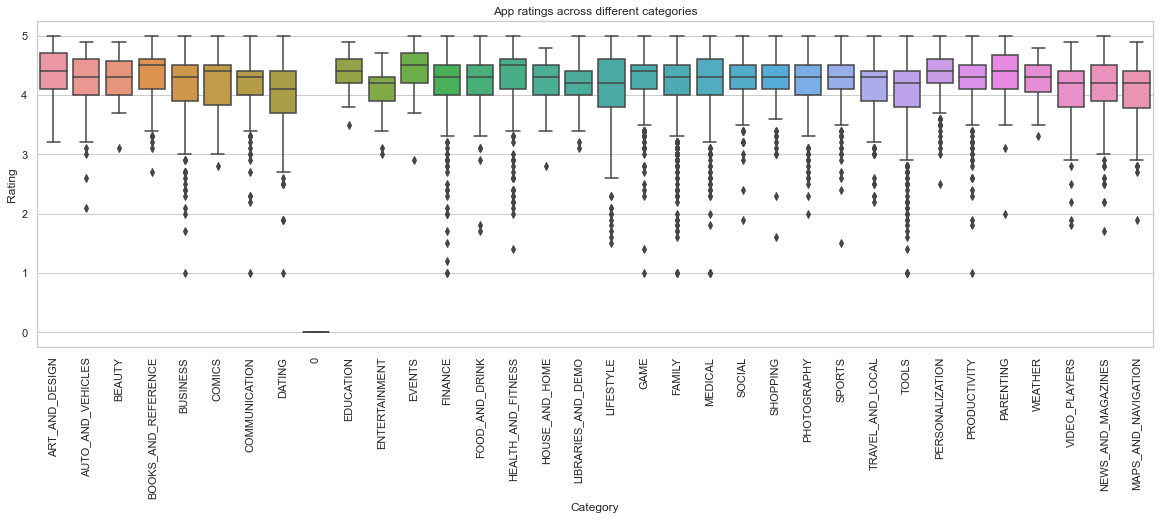

In [51]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Category',y='Rating',data = df)
plt.xticks(rotation=90)
plt.title('App ratings across different categories')
plt.show()


In [52]:
rating = pd.DataFrame(df['Rating'].describe()).T
rating

,count,mean,std,min,25%,50%,75%,max
Rating,9961.0,3.94095,1.112704,0.0,3.9,4.3,4.5,5.0


### Findings

```
The minimum and maximum rating an app can have are 1 and 5 respectively across all categories.
The mean rating of apps across all categories is 4.2 with a standard deviation of 0.51. Also, the median rating of apps across all categories is 4.3.
```

### Category vs. Reviews

In [53]:
#Number of apps having 0 reviews
len(df[df['Reviews'] == 0])
review_0_category = pd.DataFrame(df[df['Reviews'] == 0]['Category'].describe())
#App having maximum reviews.
max_review_app = df[df['Reviews'] == max(df['Reviews'])]

review_0_category
max_review_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log,Reviews_log
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,9.0,7.892975


TypeError: 'value' must be an instance of str or bytes, not a int

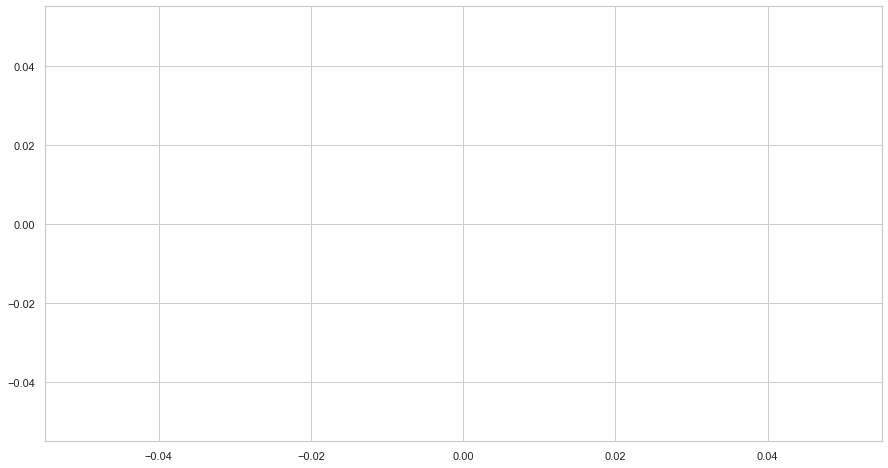

In [54]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.scatterplot(y='Category',x='Reviews',data = df,hue='Category',legend=False)
plt.xticks(rotation=90)
plt.title('Number of reviews on the basis of Category')
plt.show()

### Findings



1. Most of the apps across different categories have less than 10,000,000 reviews.
2. 596 apps have 0 reviews with most of the apps belonging to BUSINESS category.
3. The app having the maximum number of reviews(78158306) is Facebook which belong to the SOCIAL category.

The EDA is currently not complete and I will add more findings in the future.
Suggestions are welcome

In [ ]:
# 형 변환 (object -> numeric)
df['Reviews'] = pd.to_numeric(df['Reviews'])
df.Reviews

In [ ]:
df['Reviews_log'] = np.log10(df['Reviews'])

In [55]:
df.loc[df.Reviews_log == float('-inf')] = 0

In [56]:
df.sort_values('Reviews_log',ascending=False).head(2).Reviews

2544    78158306
3943    78128208
Name: Reviews, dtype: int64

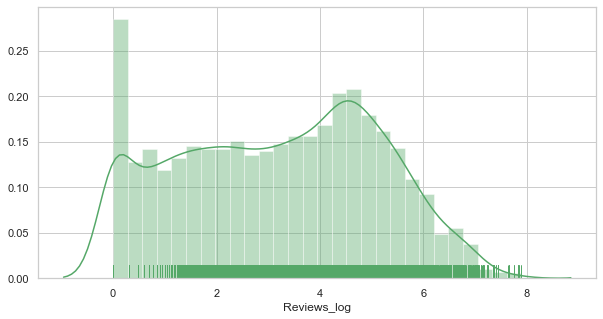

In [57]:
#histogram

plt.figure(figsize=(10,5))
sns.distplot(df['Reviews_log'],color='g',rug=True)

In [58]:
print("reviews_log 최소값 : {}, 최대값 : {}".format(df.Reviews_log.min(),df.Reviews_log.max()))

reviews_log 최소값 : 0.0, 최대값 : 7.892975137931482


### Findings

    1) Review 갯수는 약 1억개까지 분포
    2) Review 갯수 상위 앱은 Facebook (약 1억 5천개)

## 4-1. Reviews 데이터 추가분석 (상관성)

    1) log값 취한 데이터를 기준으로 상관성 분석
    2) 목표하는 Installs 컬럼을 포함한 전체 특징들과 분석



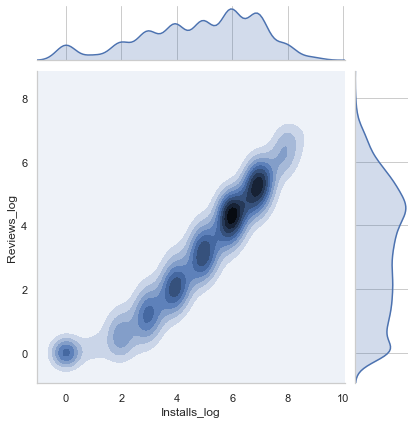

In [59]:
# kernel density function 적용

sns.jointplot(x="Installs_log", y="Reviews_log", data=df, kind='kde')

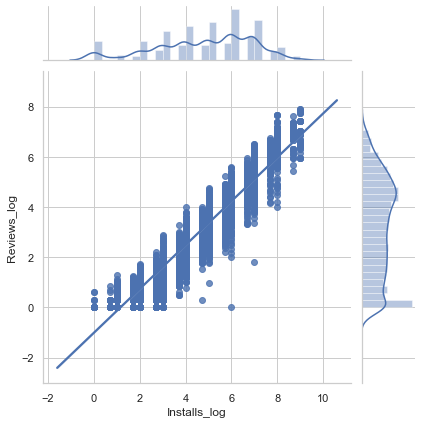

In [60]:
# joint scatter plot

sns.jointplot(x="Installs_log", y="Reviews_log", data=df, kind='reg')

In [61]:
df.corr()['Reviews_log']

Rating          0.499426
Reviews         0.289243
Installs        0.314730
Price          -0.028723
Installs_log    0.956188
Reviews_log     1.000000
Name: Reviews_log, dtype: float64

### Finding

```
Reviews수의 로그를 취한 데이터와 상관관계를 보인 데이터
    : Installs_log, Rating

```

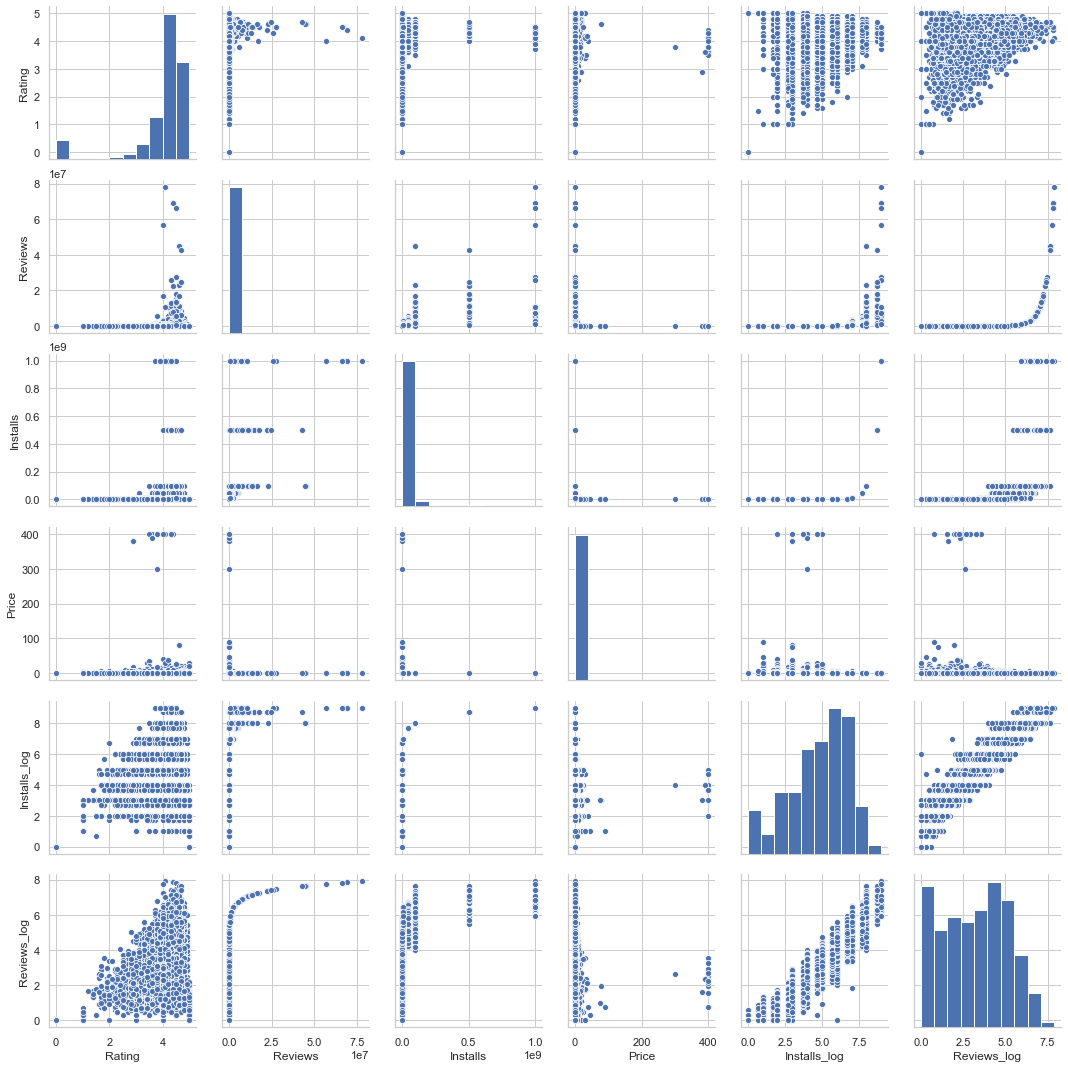

In [62]:
sns.pairplot(df)

# reviews_log <-> rating

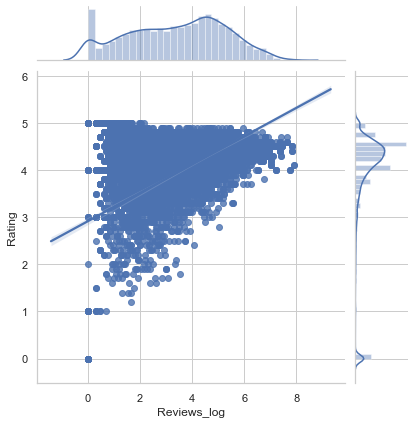

In [63]:
sns.jointplot(x="Reviews_log", y="Rating", data=df, kind='reg')

# reviews_log <-> category

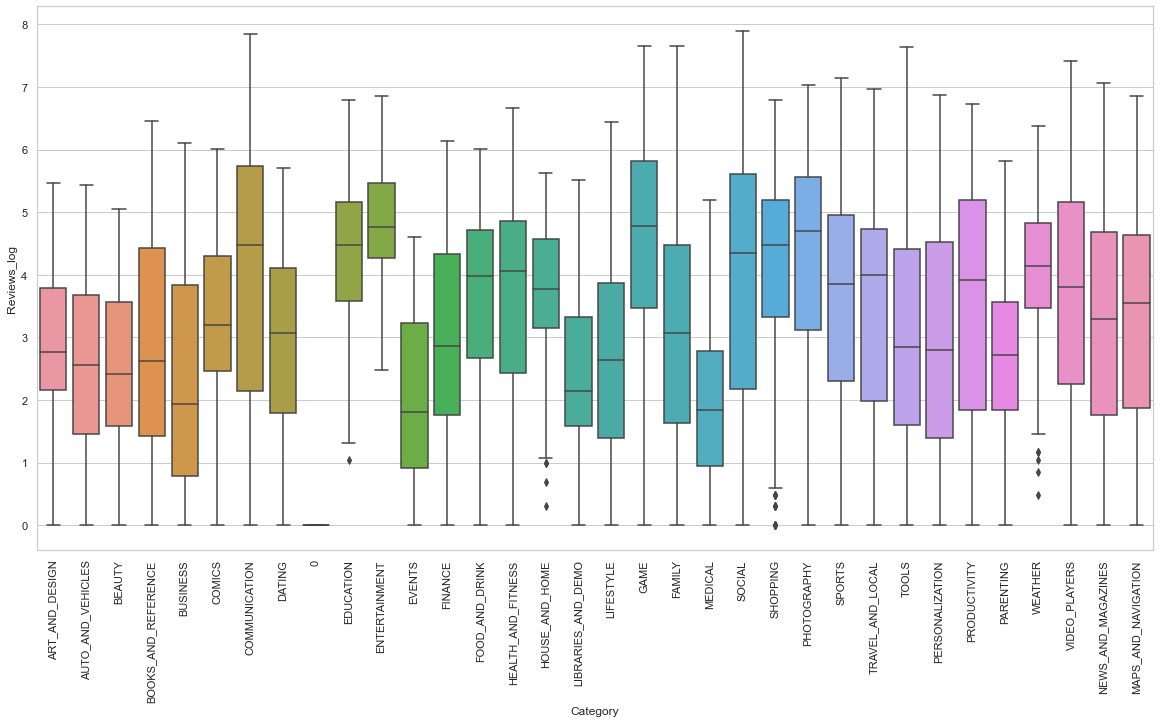

In [64]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Category", y="Reviews_log", data=df)
plt.xticks(rotation=90)
plt.show()

### 4. Installs

count    10839.000000
mean         4.809009
std          2.113471
min          0.000000
25%          3.000000
50%          5.000000
75%          6.698970
max          9.000000
Name: Installs_log, dtype: float64


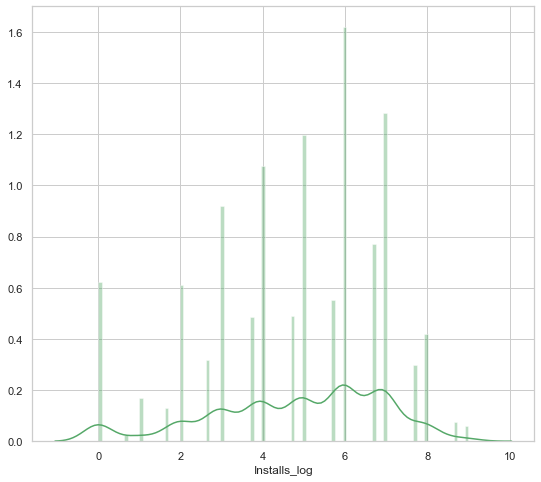

In [65]:
print(df['Installs_log'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Installs_log'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [66]:
print("평균 설치횟수 : {}회, 최대 설치횟수 : {}회, 최소 설치횟수 : {}회".format(df['Installs'].mean(),df['Installs'].max(),df['Installs'].min()))


평균 설치횟수 : 15464803.26884399회, 최대 설치횟수 : 1000000000회, 최소 설치횟수 : 0회


### Finding
```
설치횟수가 1백만 이상인 앱의 비중 : 14.57%, 1천만 이상인 앱의 비중 : 11.55%
평균 설치 횟수 : 1천 5백만 회
최대 설치 횟수 : 10억 회
최소 설치 횟수 : 0회
```

### 5. Type


In [67]:
print('Apps on the basis of Type are classified as')
print('--------------------------------------------------------------------')

count = 1
for i in df['Type'].unique():
    print(count,': ',i)
    count = count + 1

Apps on the basis of Type are classified as
--------------------------------------------------------------------
1 :  Free
2 :  Paid
3 :  0


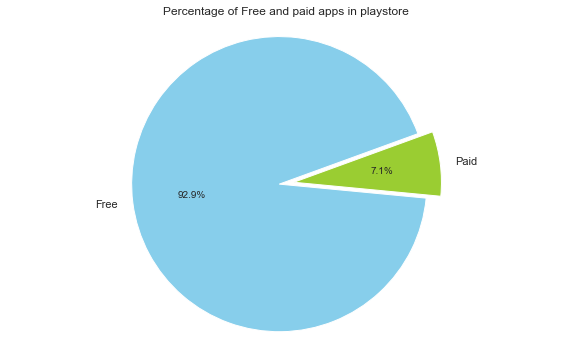

In [68]:
plt.figure(figsize=(10,6))

# Data to plot
labels = ['Free','Paid']
sizes = [len(df[df['Type'] == 'Free']),len(df[df['Type'] == 'Paid'])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.title('Percentage of Free and paid apps in playstore')
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', startangle=380,colors=colors,explode=explode)

plt.axis('equal')
plt.show()

```
Most of the apps in the app store are free.Only a small percentage of apps are paid apps.
```

### 6. Price

In [69]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$',''))
df['Price'] = pd.to_numeric(df['Price'])


#### Seperating paid apps from free apps



```
I have created a seperate dataset for paid apps from the whole playstore dataset
```

In [70]:
paid_apps = df[df['Price'] != 0]

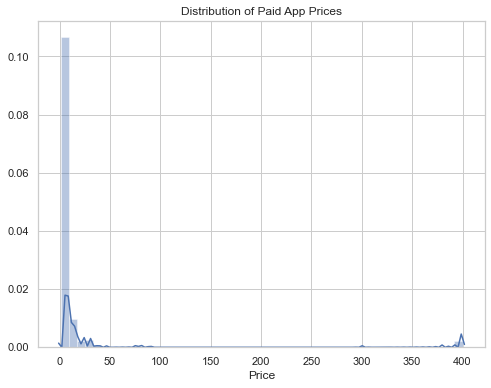

In [71]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Paid App Prices')
sns.distplot(paid_apps['Price'],bins=50)
plt.show()

In [72]:
price_less_10 = len(paid_apps[paid_apps['Price'] <= 10])/len(paid_apps)*100
print('Percentage of Apps having price less than 10$: {}%'.format(round(price_less_10,2)))

Percentage of Apps having price less than 10$: 89.36%


```
89% apps in the play store have a price tag of 10$ or less. Although some apps have price greater than 350\$

Checking apps having price greater than 350$
```

In [73]:
paid_apps[paid_apps['Price'] >= 350]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log,Reviews_log
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,2.00000,0.778151
4362,💎 I'm rich,LIFESTYLE,3.8,718,26,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,4.00000,2.856124
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,4.00000,2.439333
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,5.00000,3.549861
5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,4.00000,2.932474
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,4.69897,3.271144
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up,3.00000,1.612784
5358,I am Rich!,FINANCE,3.8,93,22,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,3.00000,1.968483
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,3.69897,2.673942
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,3.69897,2.303196


```
We found that 16 apps by the name I am rich or having similar names have a price tage of 399$ and most of them even have 10,000+ downloads.
```

### 7. Content Rating


In [74]:
print('Apps on the basis of Content Rating are classified as')
print('-------------------------------------------------------------------')

count = 1
for i in df['Content Rating'].unique():
    print(count,': ',i)
    count = count + 1

Apps on the basis of Content Rating are classified as
-------------------------------------------------------------------
1 :  Everyone
2 :  Teen
3 :  Everyone 10+
4 :  Mature 17+
5 :  Adults only 18+
6 :  0
7 :  Unrated


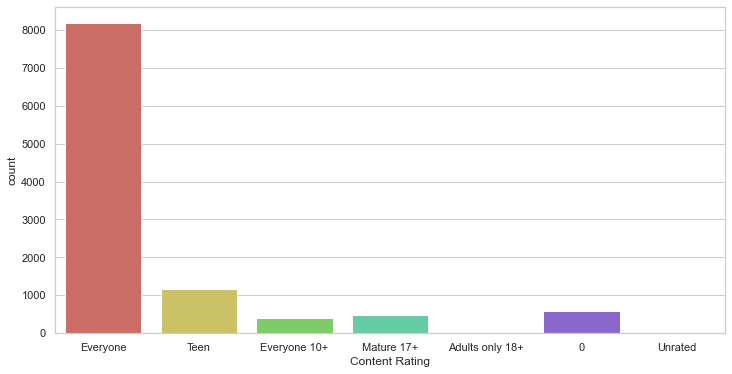

In [75]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Content Rating'],palette='hls')
plt.show()

In [76]:
print('Percentage of Apps having content rating as everyone: {}%'.format(round(len(df[df['Content Rating'] == 'Everyone'])/len(df)*100,2)))


Percentage of Apps having content rating as everyone: 75.57%


### 8. Genres


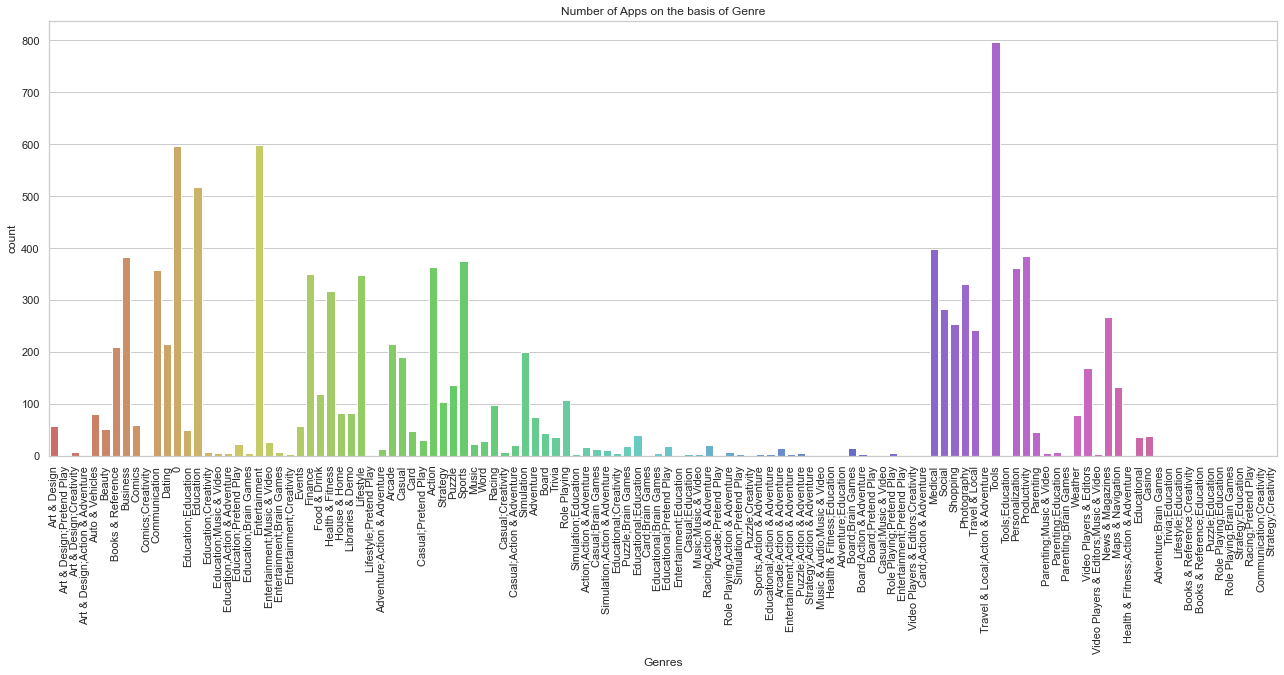

In [77]:
plt.figure(figsize=(22,8))
plt.title('Number of Apps on the basis of Genre')
sns.countplot(x='Genres',data = df,palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [78]:
print('Total Number of Genres: ',df['Genres'].nunique())


Total Number of Genres:  120


```
There are 119 Genres in the app store with the Tools Genre having the highest number of apps followed by Entertainment.
```

### 10. Current Version

TypeError: '<' not supported between instances of 'str' and 'int'

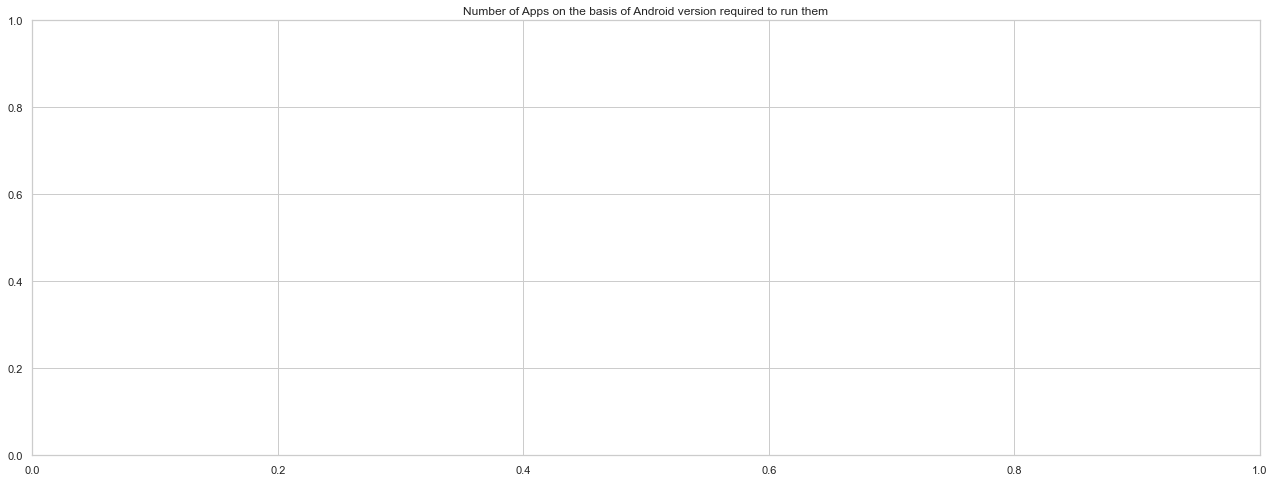

In [79]:
plt.figure(figsize=(22,8))
plt.title('Number of Apps on the basis of Android version required to run them')
sns.countplot(x='Android Ver',data = df.sort_values(by = 'Android Ver'),palette='hls')
plt.xticks(rotation = 90)

plt.show()

```
22.6% of the apps out of 10840 apps require android version 4.1 or greater version to work.
```

In [80]:
#function to convert columns to numeric data type from object data type
for i in df.columns:
    try:
        df[i] = pd.to_numeric(df[i])
    except:
        pass


### Relationships between different features¶


### 1. Rating vs. Category

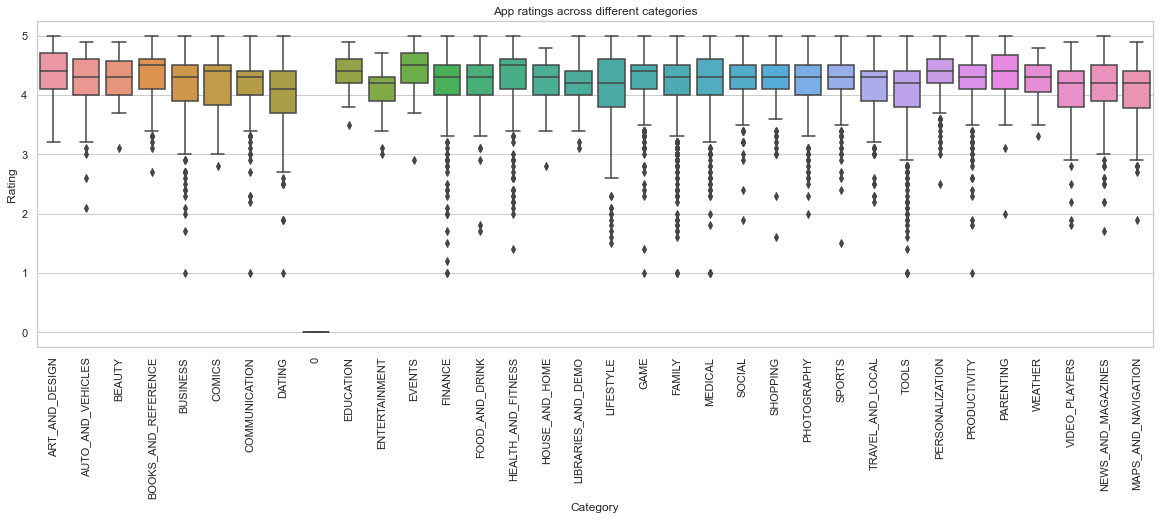

In [81]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Category',y='Rating',data = df)
plt.xticks(rotation=90)
plt.title('App ratings across different categories')
plt.show()


In [82]:
rating = pd.DataFrame(df['Rating'].describe()).T
rating

,count,mean,std,min,25%,50%,75%,max
Rating,9961.0,3.94095,1.112704,0.0,3.9,4.3,4.5,5.0


### Findings

```
The minimum and maximum rating an app can have are 1 and 5 respectively across all categories.
The mean rating of apps across all categories is 4.2 with a standard deviation of 0.51. Also, the median rating of apps across all categories is 4.3.
```

### Category vs. Reviews

In [83]:
#Number of apps having 0 reviews
len(df[df['Reviews'] == 0])
review_0_category = pd.DataFrame(df[df['Reviews'] == 0]['Category'].describe())
#App having maximum reviews.
max_review_app = df[df['Reviews'] == max(df['Reviews'])]

review_0_category
max_review_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log,Reviews_log
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,9.0,7.892975


TypeError: 'value' must be an instance of str or bytes, not a int

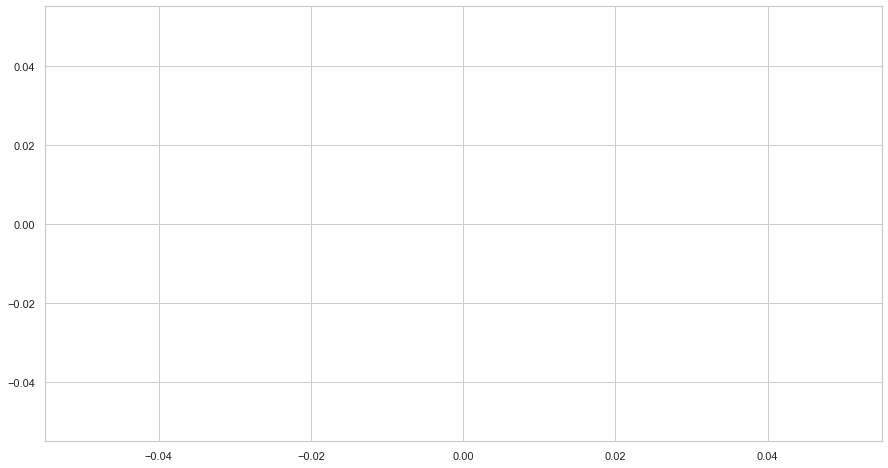

In [84]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.scatterplot(y='Category',x='Reviews',data = df,hue='Category',legend=False)
plt.xticks(rotation=90)
plt.title('Number of reviews on the basis of Category')
plt.show()

### Findings



1. Most of the apps across different categories have less than 10,000,000 reviews.
2. 596 apps have 0 reviews with most of the apps belonging to BUSINESS category.
3. The app having the maximum number of reviews(78158306) is Facebook which belong to the SOCIAL category.

The EDA is currently not complete and I will add more findings in the future.
Suggestions are welcome

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9961 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10837 non-null  object 
 13  Installs_log    10839 non-null  float64
 14  Reviews_log     10839 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 1.6+ MB
